nvidia-smi memory usage: b'391\n'


/mnt/btrfs-data/venvs/ml-tutorials/lib/python3.6/site-packages/torch/cuda/__init__.py:132: UserWarning: 
    Found GPU0 GeForce GTX 770 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


['backwards', 'boat', 'carry', 'down', 'end_comm', 'five', 'four', 'here', 'mosaic', 'num_delimiter', 'one', 'photo', 'start_comm', 'three', 'two', 'up']
16
Done preliminary phase.


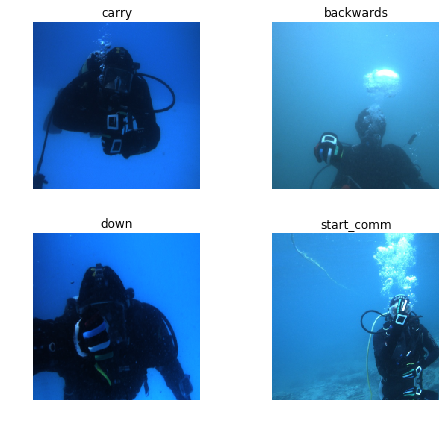

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#!/usr/bin/env python3

import sys

from fastai.vision import *
from fastai.metrics import error_rate


# -----------------------------
#from google.colab import drive
#from os import walk

#drive.mount('/content/gdrive')
# -----------------------------


# -----------------------------
# Make everything deterministic
np.random.seed(2)

import torch
torch.manual_seed(2)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
# -----------------------------

from subprocess import check_output
print('nvidia-smi memory usage:', check_output(['nvidia-smi', '--query-gpu=memory.used', '--format=csv,nounits,noheader']))

torch.cuda.empty_cache()

model_name = "resnet-50"
if model_name == "resnet-34":
	cnn_model = models.resnet34
	img_size  = 224
	epochs    = 4
	epochs_after_unfreeze = 2
	bs = 64
	# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart
else:
	cnn_model = models.resnet50
	img_size  = 224
	epochs    = 4
	epochs_after_unfreeze = 1
	# bs = 16
	bs = 4   # uncomment this line if you run out of memory even after clicking Kernel->Restart

load_saved_model = False

from datetime import datetime
currtime = datetime.now().strftime('%Y-%m-%d_%H.%M.%S')

#savepath ='/content/gdrive/My Drive/Colab Notebooks/'
savepath ='/tmp/'
#imgpath = '/mnt/btrfs-data/winxp/pcap/winxp-unpatched-probe-only-with-noise/raw/image-data-bunch/'
imgpath = '/mnt/btrfs-data/dataset/caddy-gestures/CADDY_gestures_complete_v2_release/all-scenarios'

#data = ImageDataBunch.from_folder(path_img, train='', valid='', ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)
data = (ImageList.from_folder(imgpath).split_by_rand_pct().label_from_folder().transform(get_transforms(),
                                                        size=img_size).databunch(bs=bs)).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(7,6))

print(data.classes)
print(len(data.classes))
data.c

learn = cnn_learner(data, cnn_model, metrics=error_rate)

print('Done preliminary phase.')

In [2]:
new_imgs_path = '/mnt/btrfs-data/winxp/pcap/winxp-unpatched-probe-only-with-noise/raw/images/'

for cl in data.classes:
    img_path = new_imgs_path + '/' + cl
    print(img_path)
    verify_images(img_path, delete=True)

/mnt/btrfs-data/deep-learning-datasets/downloads/bagel


/mnt/btrfs-data/deep-learning-datasets/downloads/chihuahua


/mnt/btrfs-data/deep-learning-datasets/downloads/chocolate


/mnt/btrfs-data/deep-learning-datasets/downloads/dalmatian


/mnt/btrfs-data/deep-learning-datasets/downloads/dog


/mnt/btrfs-data/deep-learning-datasets/downloads/duckling


/mnt/btrfs-data/deep-learning-datasets/downloads/friedchicken


/mnt/btrfs-data/deep-learning-datasets/downloads/guacamole


/mnt/btrfs-data/deep-learning-datasets/downloads/icecream


/mnt/btrfs-data/deep-learning-datasets/downloads/icecreamcone


/mnt/btrfs-data/deep-learning-datasets/downloads/kitten


/mnt/btrfs-data/deep-learning-datasets/downloads/labradoodle


/mnt/btrfs-data/deep-learning-datasets/downloads/marshmallow


/mnt/btrfs-data/deep-learning-datasets/downloads/mop


/mnt/btrfs-data/deep-learning-datasets/downloads/muffin


/mnt/btrfs-data/deep-learning-datasets/downloads/painauchocolat


/mnt/btrfs-data/deep-learning-datasets/downloads/parrot


/mnt/btrfs-data/deep-learning-datasets/downloads/plantain


/mnt/btrfs-data/deep-learning-datasets/downloads/sharpei


/mnt/btrfs-data/deep-learning-datasets/downloads/sheepdog


/mnt/btrfs-data/deep-learning-datasets/downloads/shiba


/mnt/btrfs-data/deep-learning-datasets/downloads/sloth


In [2]:
load_saved_model = False
if load_saved_model:
	print('Loading stage-1')
	#learn.load(savepath + model_name + '-stage-1')
	learn.load(savepath + 'resnet-50-stage-1-2019-07-11_16.24.10')
else:
	print('Training model:', model_name)
	learn.fit_one_cycle(epochs)
	learn.save(savepath + model_name + '-stage-1-' + currtime)

Training model: resnet-50


epoch,train_loss,valid_loss,error_rate,time
0,1.602054,0.872492,0.293911,12:24
1,0.952008,0.339801,0.108254,12:02
2,0.574074,0.197187,0.056834,12:13
3,0.637301,0.187705,0.054127,12:33


In [7]:
print('Exporting the model as pickle file...')
learn.export() # export model as pickle file to be used "outside fast.ai"

Exporting the model as pickle file...


Plotting LR...


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
{'bagel': 0, 'chihuahua': 1, 'chocolate': 2, 'dalmatian': 3, 'dog': 4, 'duckling': 5, 'friedchicken': 6, 'guacamole': 7, 'icecream': 8, 'icecreamcone': 9, 'kitten': 10, 'labradoodle': 11, 'marshmallow': 12, 'mop': 13, 'muffin': 14, 'painauchocolat': 15, 'parrot': 16, 'plantain': 17, 'sharpei': 18, 'sheepdog': 19, 'shiba': 20, 'sloth': 21}
Image (3, 299, 299)


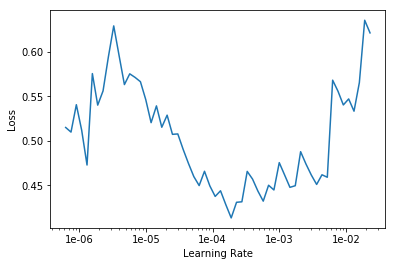

In [5]:
if not load_saved_model:
	print('Plotting LR...')
	learn.lr_find()
	learn.recorder.plot()

print(learn.data.c2i)
print(learn.data.train_ds[0][0])

In [4]:
print('Interpreting result for stage-1')
interp = ClassificationInterpretation.from_learner(learn)

Plotting top losses for stage-1


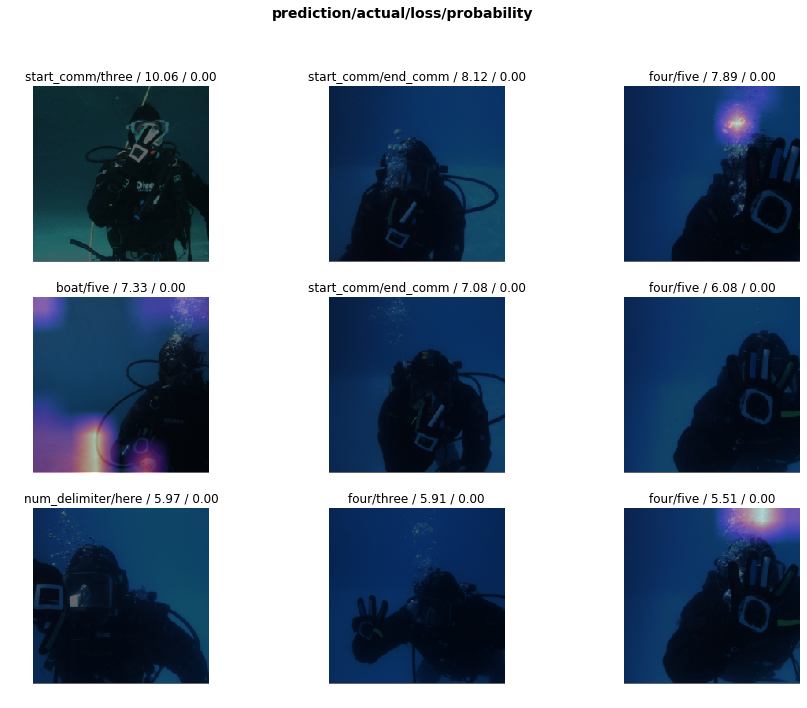

In [5]:
print('Plotting top losses for stage-1')
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))

Plotting confusion matrix/top confused for stage-1


[('start_comm', 'end_comm', 23),
 ('three', 'four', 22),
 ('end_comm', 'start_comm', 15),
 ('two', 'one', 13),
 ('backwards', 'num_delimiter', 9),
 ('end_comm', 'num_delimiter', 8),
 ('two', 'three', 8),
 ('two', 'start_comm', 6),
 ('up', 'end_comm', 6),
 ('five', 'four', 5),
 ('here', 'num_delimiter', 5),
 ('one', 'two', 5),
 ('here', 'carry', 4),
 ('num_delimiter', 'end_comm', 4),
 ('one', 'three', 4),
 ('photo', 'two', 4),
 ('backwards', 'down', 3),
 ('backwards', 'end_comm', 3),
 ('four', 'three', 3),
 ('one', 'num_delimiter', 3),
 ('three', 'two', 3),
 ('backwards', 'here', 2),
 ('backwards', 'up', 2),
 ('carry', 'num_delimiter', 2),
 ('carry', 'up', 2),
 ('here', 'backwards', 2),
 ('photo', 'up', 2),
 ('start_comm', 'down', 2),
 ('start_comm', 'num_delimiter', 2),
 ('up', 'carry', 2)]

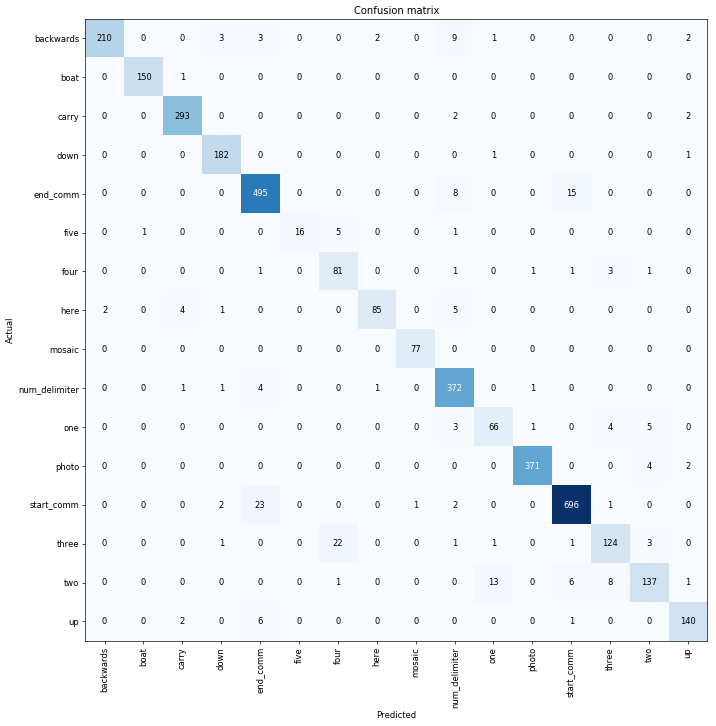

In [6]:
print('Plotting confusion matrix/top confused for stage-1')
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.most_confused(min_val=2)

In [8]:
epochs_after_unfreeze = 1
learn.data.batch_size = 2
load_saved_model = True
print(learn.data.batch_size)

if load_saved_model:
	print('Loading stage-1')
	#learn.load(savepath + model_name + '-stage-2')
	learn.load(savepath + 'resnet-50-stage-1-2019-07-08_13.20.01')       # load your model here to jump start most of the code in this notebook
    
	print('Unfreezing and transfer-learning model:', model_name)
	learn.unfreeze()
	learn.fit_one_cycle(epochs_after_unfreeze, max_lr=slice(1e-6,1e-4))
	learn.save(savepath + model_name + '-stage-2-' + currtime)
    
	learn.export()
else:
	print('Unfreezing and transfer-learning model:', model_name)
	learn.unfreeze()
	learn.fit_one_cycle(epochs_after_unfreeze, max_lr=slice(1e-6,1e-4))
	learn.save(savepath + model_name + '-stage-2-' + currtime)

2
Loading stage-1
Unfreezing and transfer-learning model: resnet-50


epoch,train_loss,valid_loss,error_rate,time
0,1.216943,0.277623,0.056300,04:07


In [13]:
if not load_saved_model:
	print('Plotting LR...')
	learn.lr_find()
	learn.recorder.plot()

Loading stage-2
Unfreezing and transfer-learning model: resnet-50


epoch,train_loss,valid_loss,error_rate,time
0,0.058401,0.213449,0.053619,02:26


In [10]:
doc(learn.export)

TypeError: markdown2html() missing 1 required positional argument: 'source'

In [8]:
print('Interpreting result for stage-2')
interp = ClassificationInterpretation.from_learner(learn)

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 1.95 GiB total capacity; 1.12 GiB already allocated; 8.25 MiB free; 11.84 MiB cached)

Plotting top losses for stage-2
Plotting confusion matrix/top confused for stage-2
(Category bagel, tensor(0), tensor([1.0000e+00, 1.1409e-13, 2.4662e-08, 5.5214e-14, 2.3813e-11, 2.9153e-11,
        1.3971e-13, 1.4188e-11, 1.7523e-12, 3.2980e-12, 1.2849e-10, 2.0576e-14,
        2.8388e-13, 9.2374e-12, 2.6910e-12, 1.0891e-13, 2.8020e-16, 3.4010e-13,
        5.3232e-14, 5.9216e-13, 7.2744e-11, 1.0902e-10]))
(Category bagel, tensor(0), tensor([1.0000e+00, 5.6344e-12, 5.3989e-07, 1.6321e-12, 1.0439e-09, 1.2192e-09,
        1.3722e-12, 7.3337e-10, 2.2008e-11, 5.3904e-10, 1.5459e-09, 2.7429e-12,
        3.9962e-12, 2.7141e-10, 2.5353e-10, 1.7451e-12, 1.2293e-14, 1.6262e-11,
        9.9798e-13, 3.1814e-11, 6.3449e-10, 1.2293e-09]))
(Category bagel, tensor(0), tensor([1.0000e+00, 1.4627e-12, 2.2416e-07, 3.3996e-13, 2.2376e-10, 2.3631e-10,
        7.9645e-13, 4.7318e-11, 5.8743e-11, 6.1285e-11, 2.0398e-09, 4.2980e-13,
        4.2275e-12, 9.6981e-11, 2.1611e-11, 3.2580e-12, 1.5735e-15, 7.4414e-1

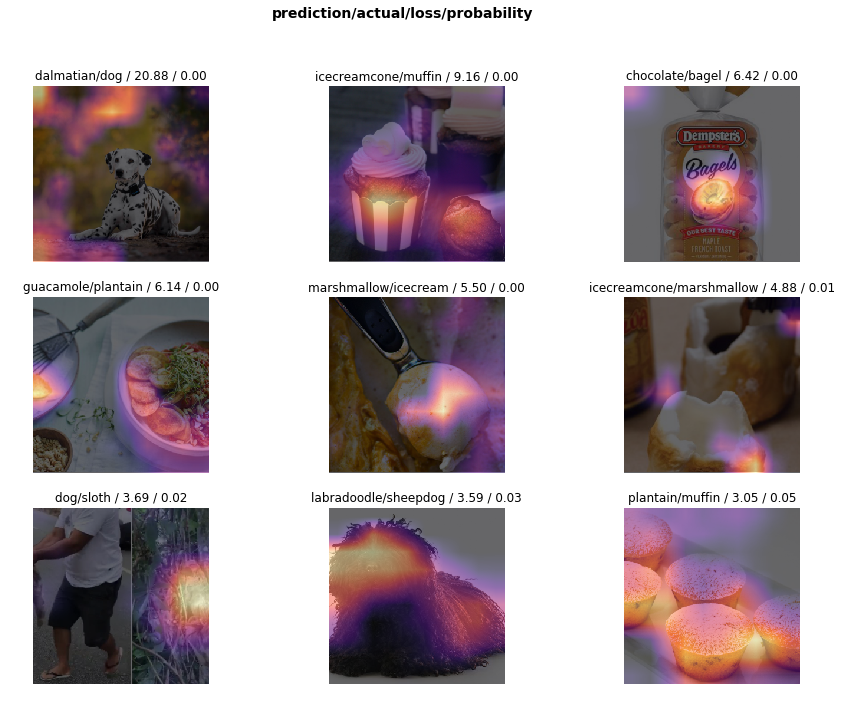

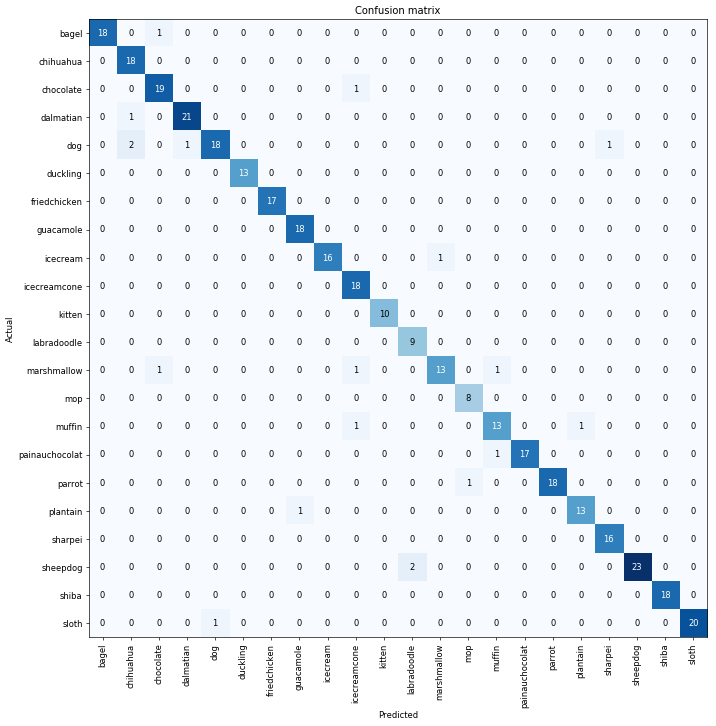

In [11]:
print('Plotting top losses for stage-2')
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))


print('Plotting confusion matrix/top confused for stage-2')
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.most_confused(min_val=2)

for i in range(10):
	img = learn.data.train_ds[0][0]
	img.save('/tmp/image.png')
	print(learn.predict(img))

In [ ]:
learn.export()